In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [3]:
data_path = "C:/Users/sumee/Downloads/archive (5)/skin-disease-datasaet/train_set"

In [4]:
train_data = []
val_data = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    file = os.listdir(folder_path)
    num_train = int(0.8 * len(file))
    files_train = random.sample(file, num_train)
    files_val = list(set(file) - set(files_train))
    
    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        train_data.append((img, folder))
        
    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        val_data.append((img, folder))

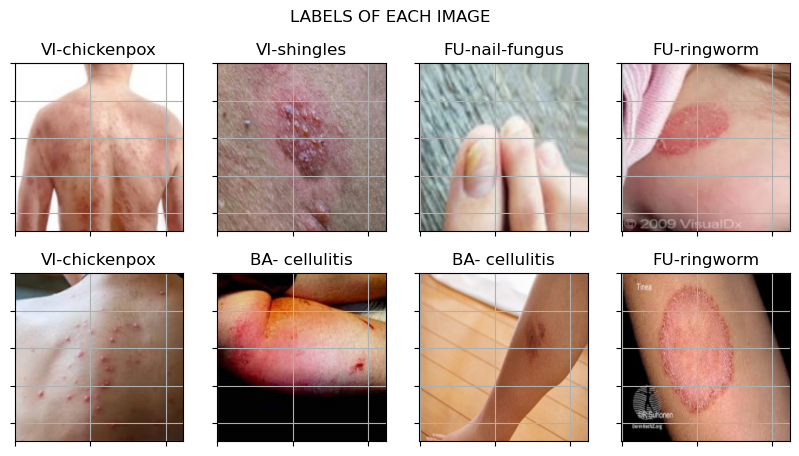

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.suptitle('LABELS OF EACH IMAGE')

for (img, label), ax in zip(random.sample(train_data, 8), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(True)
    ax.set_title(label)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

plt.show()

In [6]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
base_model.trainable = False

In [8]:
num_classes = 8
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# train_data = [(preprocess_input(input), label) for input, label in train_data]
# val_data = [(preprocess_input(input), label) for input, label in val_data]

X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

In [11]:
# Print class mapping
class_mapping = {index: label for index, label in enumerate(le.classes_)}
for index, label in class_mapping.items():
    print(f"Index: {index}, Class: {label}")

Index: 0, Class: BA- cellulitis
Index: 1, Class: BA-impetigo
Index: 2, Class: FU-athlete-foot
Index: 3, Class: FU-nail-fungus
Index: 4, Class: FU-ringworm
Index: 5, Class: PA-cutaneous-larva-migrans
Index: 6, Class: VI-chickenpox
Index: 7, Class: VI-shingles


In [12]:
EPOCHS = 12
BATCH_SIZE = 32
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot),
                   epochs = EPOCHS, batch_size=BATCH_SIZE)

model.save("C:/Users/sumee/Downloads/archive (5)/skin-disease-datasaet/model1.h5")




Epoch 1/12


24/24 [==============================] - 35s 1s/step - loss: 1.1780 - accuracy: 0.6965 - val_loss: 0.3152 - val_accuracy: 0.9091
Epoch 2/12
24/24 [==============================] - 30s 1s/step - loss: 0.1435 - accuracy: 0.9512 - val_loss: 0.1839 - val_accuracy: 0.9412
Epoch 3/12
24/24 [==============================] - 31s 1s/step - loss: 0.0324 - accuracy: 0.9932 - val_loss: 0.1188 - val_accuracy: 0.9572
Epoch 4/12
24/24 [==============================] - 31s 1s/step - loss: 0.0109 - accuracy: 0.9986 - val_loss: 0.1111 - val_accuracy: 0.9572
Epoch 5/12
24/24 [==============================] - 34s 1s/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.1078 - val_accuracy: 0.9572
Epoch 6/12
24/24 [==============================] - 35s 1s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.9572
Epoch 7/12
24/24 [==============================] - 33s 1s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1024 - val_accuracy: 0.9626
Epoch 8/12
24/24 [

c:\Users\sumee\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


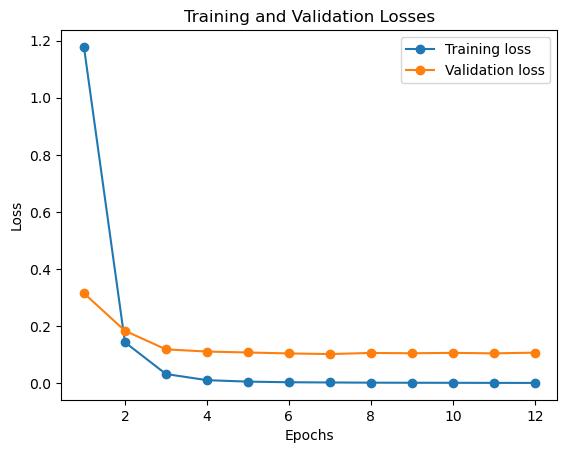

In [13]:
# Get the training and validation losses from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training loss', marker='o')
plt.plot(epochs, val_loss,label='Validation loss', marker='o')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

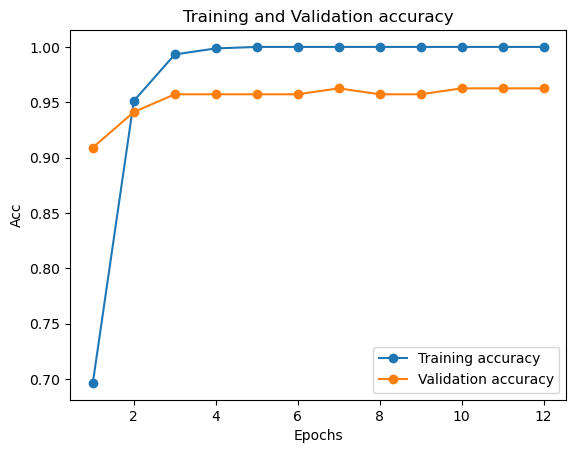

In [14]:
# Get the training and validation losses from the history object
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, train_loss,label='Training accuracy', marker='o')
plt.plot(epochs, val_loss,label='Validation accuracy', marker='o')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

# Show the plot
plt.show()

In [15]:
from tensorflow.keras.models import load_model

In [16]:
test_path = "C:/Users/sumee/Downloads/archive (5)/skin-disease-datasaet/test_set"

In [17]:
model = load_model('C:/Users/sumee/Downloads/archive (5)/skin-disease-datasaet/model1.h5') 

In [18]:
real_label = []
predicted_class = []

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        img = preprocess_input(np.array([img]))  # Add an extra dimension for batching

        predictions = model.predict(img)
        real_label.append(folder)
        predicted_class_index = np.argmax(predictions)
        predicted_class.append(le.classes_[predicted_class_index])

1/1 [==============================] - 0s 178ms/step


In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(real_label, predicted_class)

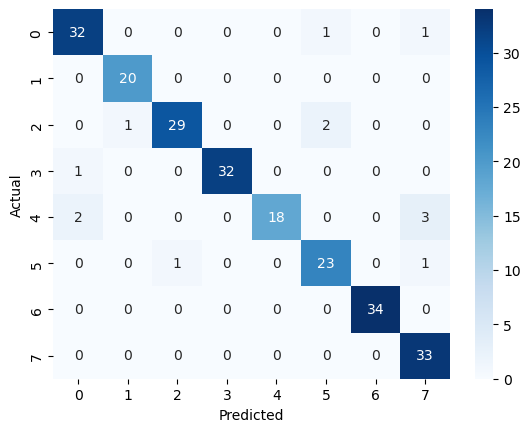

In [22]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()